findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


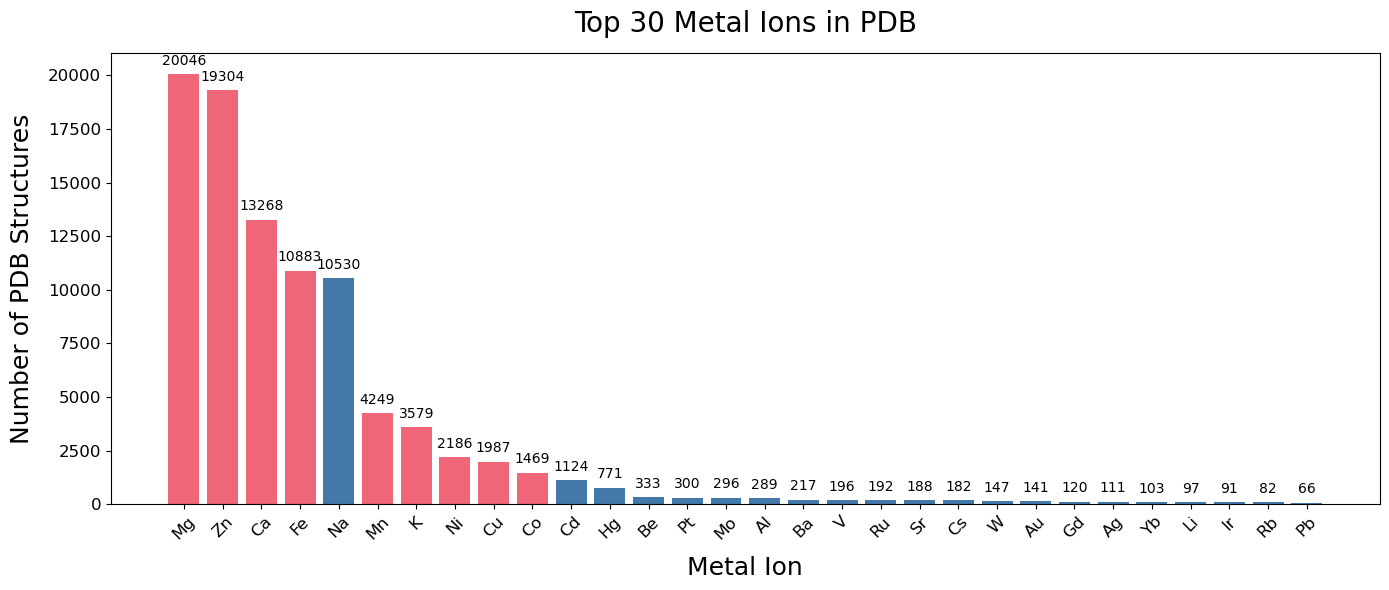

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from io import StringIO

# Arial 폰트 설정 (로컬 환경에서 Arial 설치되어 있어야 적용됨)
mpl.rcParams['font.family'] = 'Arial'

# 데이터 입력
data = """
Metal	Number of sites	Number of atoms	Number of PDB structures	Number of representative sites
Mg	186646	215089	20046	7924
Zn	54725	59987	19304	5436
Ca	39655	45738	13268	4509
Fe	33621	59074	10883	1208
Na	29746	31943	10530	4942
Mn	13245	17120	4249	1112
K	11453	13210	3579	1142
Ni	4341	4680	2186	863
Cu	5980	8232	1987	476
Co	3914	4386	1469	515
Cd	5418	6473	1124	1822
Hg	2293	2752	771	671
Be	892	893	333	75
Pt	836	1031	300	233
Mo	714	1186	296	65
Al	659	663	289	85
Ba	999	1155	217	100
V	348	576	196	79
Ru	343	432	192	65
Sr	3860	4189	188	144
Cs	869	980	182	138
W	445	3072	147	116
Au	535	697	141	146
Gd	406	492	120	87
Ag	316	720	111	47
Yb	302	336	103	51
Li	181	186	97	66
Ir	512	556	91	75
Rb	309	398	82	56
Pb	212	241	66	94
Y	214	241	65	82
"""

# 데이터프레임 생성
df = pd.read_csv(StringIO(data), sep="\t")

# 상위 30개 금속만 선택
df_top30 = df.sort_values(by="Number of PDB structures", ascending=False).head(30)

# 강조할 금속 리스트
selected_metals = {"Mg", "Zn", "Mn", "Ca", "Fe", "Ni", "Co", "Cu", "K"}

# 색상 지정
colors = ['#EE6677' if metal in selected_metals else '#4477AA' for metal in df_top30["Metal"]]

# 그래프 그리기
plt.figure(figsize=(14, 6))
bars = plt.bar(df_top30["Metal"], df_top30["Number of PDB structures"], color=colors)

# 축/제목 폰트 크기
plt.xlabel("Metal Ion", fontsize=18, labelpad=10)
plt.ylabel("Number of PDB Structures", fontsize=18, labelpad=10)
plt.title("Top 30 Metal Ions in PDB", fontsize=20, pad=15)

# 숫자 라벨 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# X축 회전 및 폰트
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()
